<a href="https://colab.research.google.com/github/reza-debug/Convolutinal_Neural_Netork/blob/main/Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data 📢

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [9]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

# Preprocessing 🥨

In [11]:
x_train = x_train.reshape((-1,28,28,1)).astype('float') / 255
x_test = x_test.reshape((-1,28,28,1)).astype('float') / 255

In [12]:
x_train.shape

(60000, 28, 28, 1)

# Model definition 🐶

In [18]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
#add Max pooling
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
#add Average pooling
model.add(keras.layers.AveragePooling2D(pool_size=(2,2)))
#faltting
model.add(keras.layers.Flatten())
#hidden layers
model.add(keras.layers.Dense(units=128,activation='relu'))
#output layer
model.add(keras.layers.Dense(units=10,activation='softmax'))
#compile
model.compile( optimizer = tf.optimizers.Adam() , loss = tf.losses.sparse_categorical_crossentropy , metrics=['accuracy'] )


In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 average_pooling2d_2 (Avera  (None, 5, 5, 32)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [20]:

hist = model.fit(x_train,y_train, epochs=10 , batch_size=256 , validation_data=(x_test,y_test) )

Epoch 1/10
235/235 [==============================] - 6s 8ms/step - loss: 0.3821 - accuracy: 0.8928 - val_loss: 0.1173 - val_accuracy: 0.9650
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0951 - accuracy: 0.9717 - val_loss: 0.0703 - val_accuracy: 0.9791
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0665 - accuracy: 0.9795 - val_loss: 0.0544 - val_accuracy: 0.9821
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.0432 - val_accuracy: 0.9868
Epoch 5/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0420 - val_accuracy: 0.9861
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0340 - val_accuracy: 0.9885
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0321 - val_accuracy: 0.9890
Epoch 

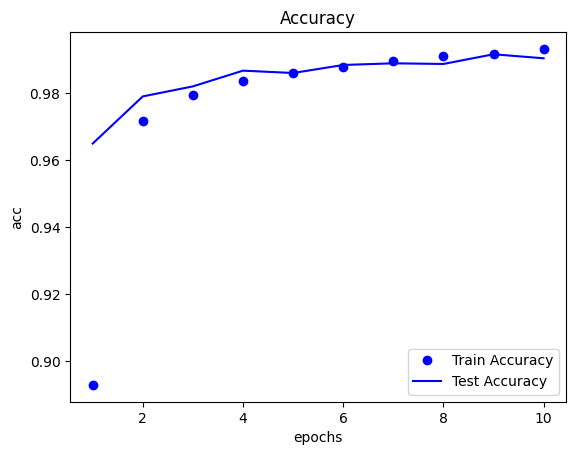

In [21]:
import matplotlib.pyplot as plt

# دسترسی به معیارهای عملکرد آموزش و اعتبارسنجی
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# دسترسی به تعداد دوره‌ها
epochs = range(1, len(accuracy) + 1)

# رسم نمودار دقت آموزش و اعتبارسنجی
plt.plot(epochs, accuracy, 'bo', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()